In [136]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from scipy.stats import linregress 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler 

In [137]:
housing_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
housing_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

X_train, y_train = housing_train.iloc[:, :-1], housing_train.iloc[:, -1]
X_test, y_test = housing_test.iloc[:, :-1], housing_test.iloc[:, -1]

In [138]:
X_train["setname"] = "train" 
X_test["setname"] = "test"

df = pd.concat([X_train, X_test])

X_train, X_test = df.loc[ df.setname == "train", :], df.loc[ df.setname == "test", :]
X_train.drop(['setname'], axis=1, inplace = True)
X_test.drop(['setname'], axis=1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [139]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) 
linear_predictions = model.predict(X_test)


In [140]:
model.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

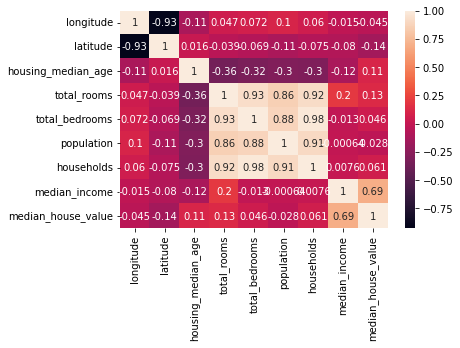

In [141]:
sns.heatmap(housing_train.corr(), annot=True)

In [142]:
DEGREE = 2
housing_train["setname"], housing_test["setname"] = "train", "test"
df = pd.concat([housing_train, housing_test])
transformer = PolynomialFeatures(degree=DEGREE)
X_train, X_test = df.loc[df.setname == "train", :], df.loc[df.setname == "test", :]

X_train.drop(['setname'], axis=1, inplace=True)
X_test.drop(['setname'], axis=1, inplace=True)

X_train, y_train = X_train.iloc[:, :-1], X_train.iloc[:, -1]
X_test, y_test = X_test.iloc[:, :-1], X_test.iloc[:, -1]

X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

poly_predictions = poly_model.predict(X_test_poly)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:
acc = poly_model.score(X_test_poly, y_test)
print(f"The model explains {acc*100} % of the variance.")

The model explains 66.45927997724851 % of the variance.


In [144]:
sc_X = StandardScaler()
sc_y = StandardScaler()

sc_X.fit(df.iloc[:, :-2])
sc_y.fit(df.iloc[:, -2].values.reshape(20000, 1))

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.transform(y_train.values.reshape(-1, 1))
y_test = sc_y.transform(y_test.values.reshape(-1, 1))

vector_regressor = SVR(kernel='linear')
vector_regressor.fit(X_train, y_train)
acc_svr = vector_regressor.score(X_test, y_test)
print(f"The accuracy of the model is {acc_svr} % ")


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the model is 0.6044298770330807 % 


In [145]:
svr_predictions = sc_y.inverse_transform(vector_regressor.predict(X_test).reshape(-1, 1)) 

In [146]:
housing_test["linear_model"] = linear_predictions 
housing_test["poly_model"] = poly_predictions 
housing_test["svr_model"] = svr_predictions

In [147]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,setname,linear_model,poly_model,svr_model
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,test,352812.311125,374593.525550,343817.873774
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,test,212717.700745,209948.282333,195861.528552
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,test,272344.699519,265109.941112,259319.307999
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,test,314244.319350,335565.774366,304507.089632
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,test,119644.222387,120527.458289,111741.621108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,test,189380.856561,222235.650114,172910.421904
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,test,178045.664529,156510.696474,166932.894539
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,test,88220.586437,104963.633216,80590.349019
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,test,146374.674815,118384.421849,133046.876069
